<a href="https://colab.research.google.com/github/Rajeev67/Credit_card_fraud_detection_ml/blob/master/Credit_card_fraud_detection_new_dataset(2023).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud detection project


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Problem
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### 2.Data
* You can download dataset from
https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023/data

* This dataset contains credit card transactions made by European cardholders in the year 2023. It comprises over 550,000 records, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

### 3. Evaluation
The trained model will be evaluated using various evaluation metrices.

### 4. Features
* id: Unique identifier for each transaction
* V1-V28: Anonymized features representing various transaction attributes (e.g., time, location, etc.)
* Amount: The transaction amount
* Class: Binary label indicating whether the transaction is fraudulent (1) or not (0)


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.




## Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import OneClassSVM
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
LABELS = ["Normal", "Fraud"]

In [ ]:
#Importing the libraries
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import average_precision_score, precision_recall_curve

from sklearn.model_selection import train_test_split


from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier

#To import warnings
import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/creditcard_2023.csv')
data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
data.shape

(568630, 31)

Plotting the distribution of a variable

In [ ]:
x = data.drop(['Class'],axis = 1)
x = x[:100000]

In [ ]:
#Accumulating all the column names uner one variable
cols = list(x.columns.values)

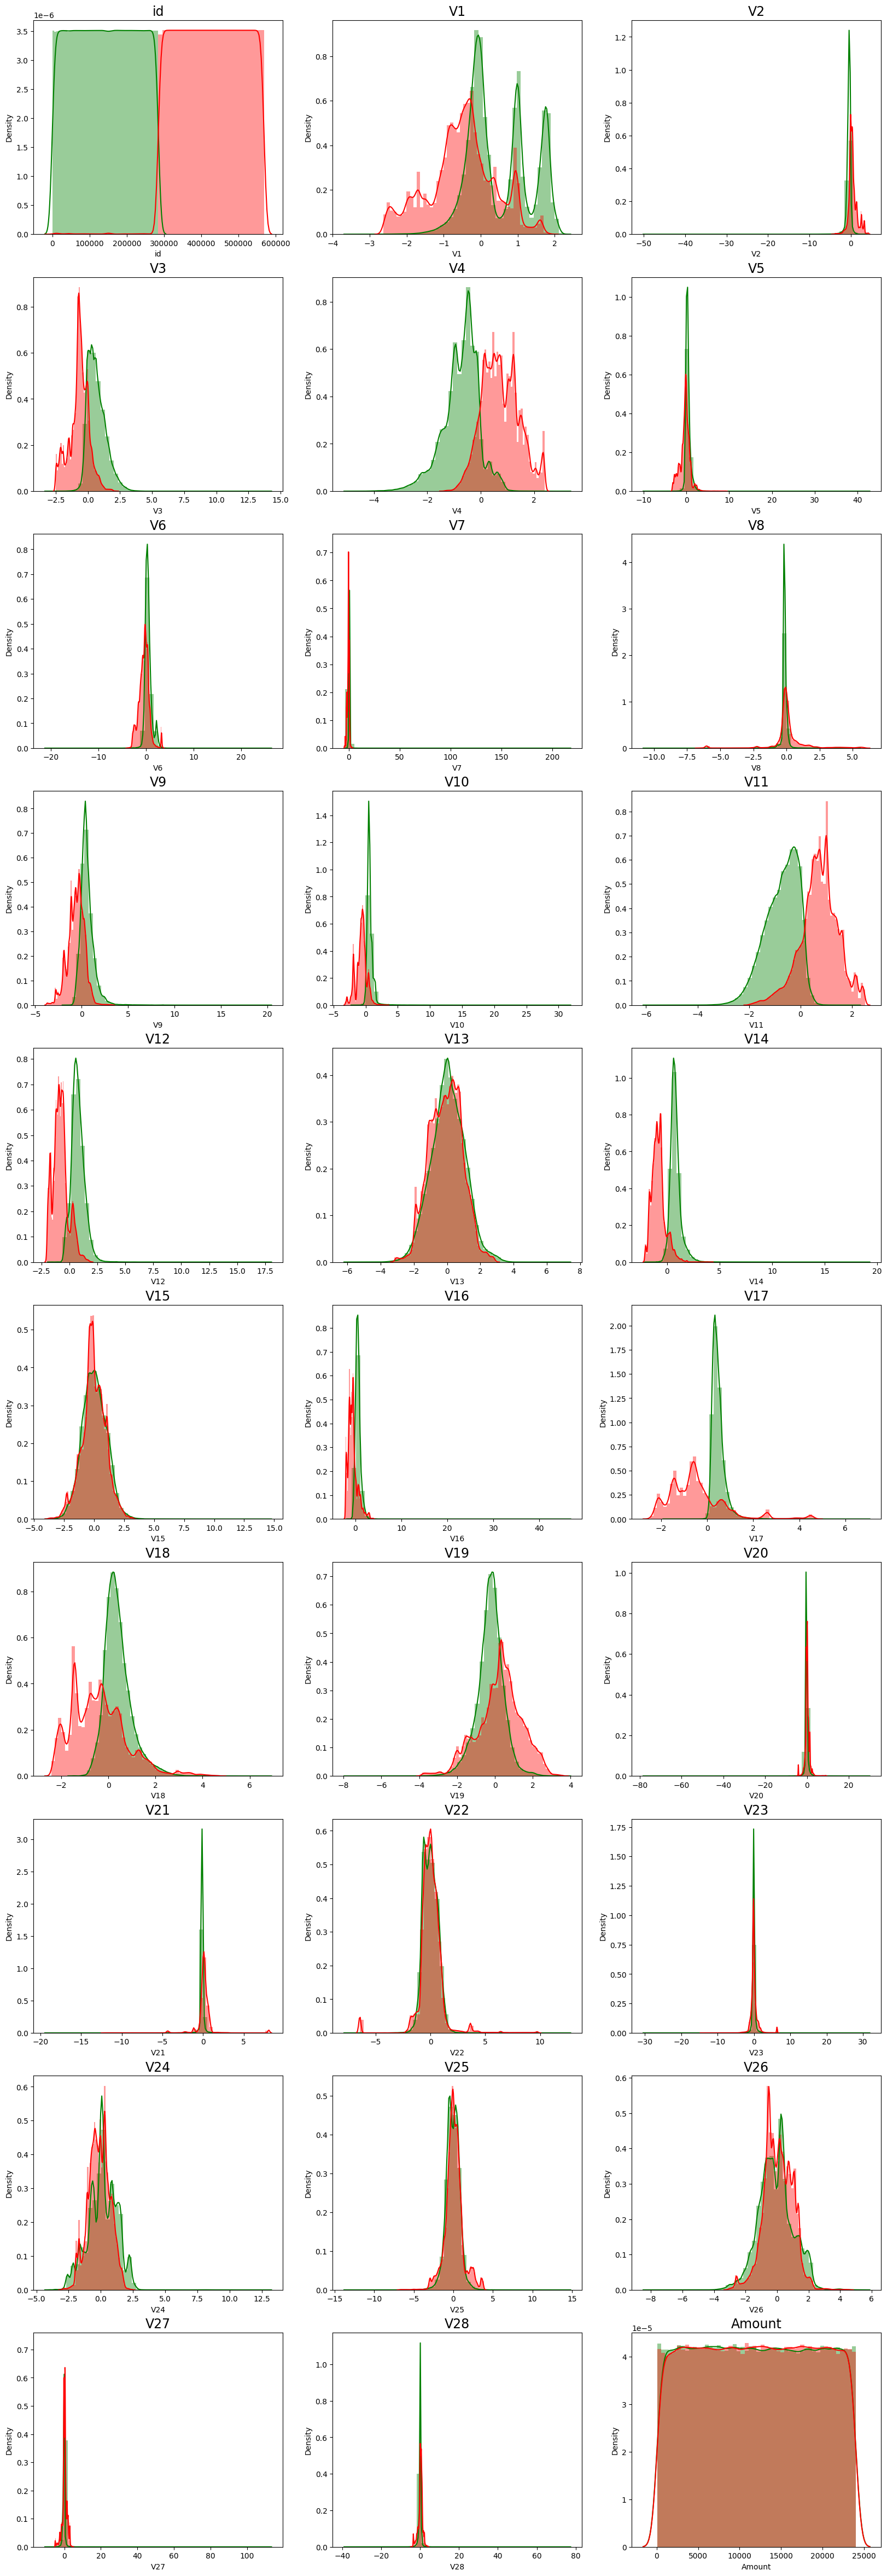

In [ ]:
#Plot the histogram of a variable from the dataset to see the skewness
normal_records = data.Class == 0
fraud_records = data.Class == 1

plt.figure(figsize=(20,60))
for n , col in enumerate(cols):
    plt.subplot(10,3,n+1)
    sns.distplot(x[col][normal_records], color = 'green')
    sns.distplot(x[col][fraud_records] , color = 'red')
    plt.title(col,fontsize = 17)
plt.show();

## Exploratory Data Analysis

In [ ]:
#checking missing values
data.isnull().values.any()

False

In [ ]:
#distribution of legit transaction and fraudulent transaction
data["Class"].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

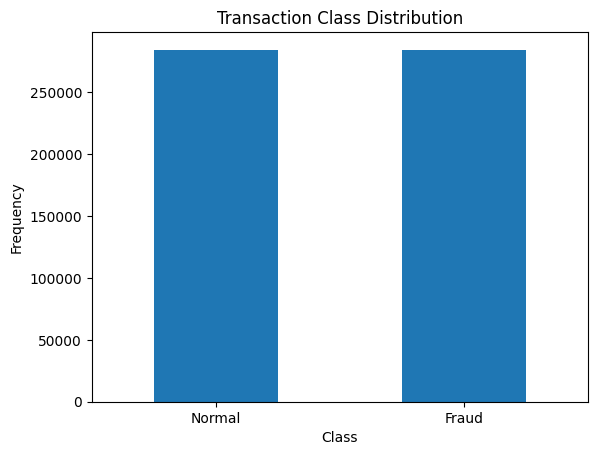

In [ ]:
count_classes = pd.value_counts(data['Class'])
count_classes.plot(kind = 'bar')
plt.title("Transaction Class Distribution")
plt.xticks(range(0,2), ['Normal','Fraud'],rotation = 0)
#plt.xticks([0,1], ['Normal','Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
#Get the Fraud and the normal dataset
fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [ ]:
print(fraud.shape,normal.shape)

(284315, 31) (284315, 31)


In [ ]:
data.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


In [ ]:
## Analysing data in different classes

In [ ]:
#fraud class
fraud.Amount.describe()

count    284315.000000
mean      12057.601763
std        6909.750891
min          50.010000
25%        6074.640000
50%       12062.450000
75%       18033.780000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
#normal class
normal.Amount.describe()

count    284315.000000
mean      12026.313506
std        6929.500715
min          50.120000
25%        6034.540000
50%       11996.900000
75%       18040.265000
max       24039.930000
Name: Amount, dtype: float64

In [ ]:
#compare the values for both transactions

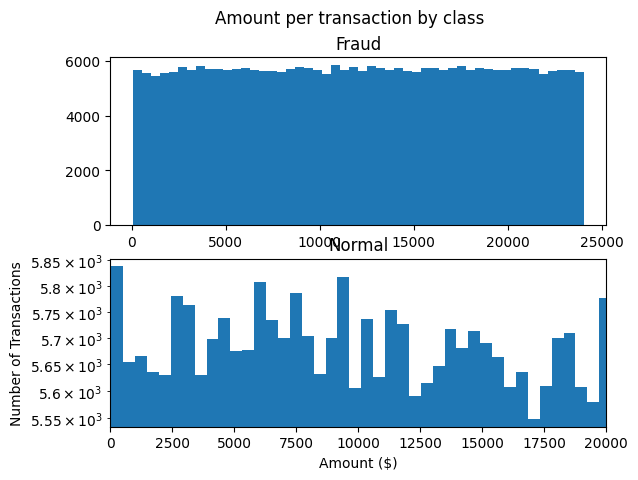

In [ ]:
#exploring data transaction of different classes w.r.t amount
f,(ax1,ax2) = plt.subplots(2,1)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount,bins=bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount,bins=bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0,20000))
plt.yscale('log')
plt.show()

Fraud transaction are done on less Amount($)

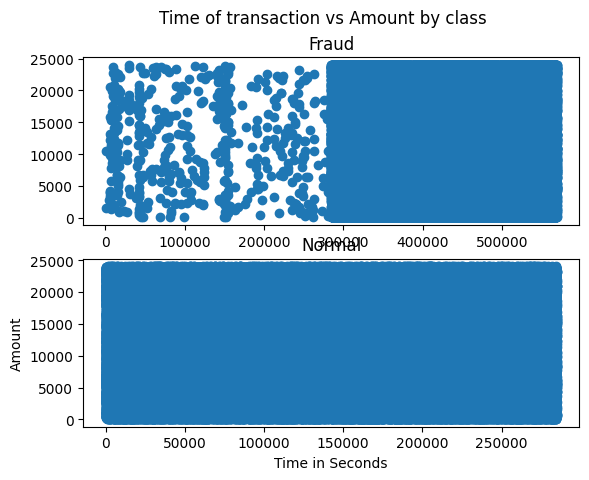

In [ ]:
#exploring data transaction of different class w.r.t time
f,(ax1,ax2) = plt.subplots(2,1)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.id,fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.id,normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time in Seconds')
plt.ylabel('Amount')
plt.show()

Fraud transaction are done in close time intervals

In [ ]:
#Take some sample of data
# data1 = data.sample(frac = 0.1 , random_state = 1)
data1 = data.sample(frac = 0.1)
data1.shape

(56863, 31)

In [ ]:
data.shape

(568630, 31)

In [ ]:
#Determine the number of fraud and valid transactions in the dataset
Fraud = data1[data1['Class']==1]
Valid = data1[data1['Class']==0]
outlier_fraction = len(Fraud)/float(len(Valid))

In [ ]:
print("Fraud Cases : {}".format(len(Fraud)))
print("Valid Cases : {}".format(len(Valid)))
print("outlier_fraction : {}".format(outlier_fraction) )

Fraud Cases : 28554
Valid Cases : 28309
outlier_fraction : 1.0086544915044686


In [ ]:
#Anothe code using
#legit and fraud_data

## Under-Sampling

Build a sample dataset containing similar distribution of normal transaction and Fraudulent Transactions

No. of fraudulent transaction --> 492

Merge 492 fraud tansaction with 492 legit transaction

In [ ]:
legit = data[data["Class"]==0]
fraud_data = data[data["Class"]==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(284315, 31)


In [ ]:
legit.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [ ]:
fraud_data.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
623,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
4920,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
6108,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
6329,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1


In [ ]:
legit_sample = legit.sample(n=min(fraud_data.Amount.size,legit.Amount.size))
fraud_sample = fraud_data.sample(n=min(fraud_data.Amount.size,legit.Amount.size))

In [ ]:
print(legit_sample.shape)
print(fraud_sample.shape)

(284315, 31)
(284315, 31)


## Concatinating two DataFrames

In [ ]:
new_dataset = pd.concat([legit_sample,fraud_sample],axis=0)

In [ ]:
new_dataset.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
121707,121707,0.065479,-0.183502,0.317403,-0.779452,1.658574,2.212603,0.532443,0.054594,0.127076,...,-0.074410,0.124431,-0.162089,2.225538,-0.124157,-0.718662,0.268615,0.433726,16020.69,0
212705,212705,1.702162,-0.547597,0.024662,-0.445902,0.290388,0.215238,0.454462,-0.184139,1.014324,...,-0.019473,0.818961,-0.137668,-0.563060,0.553487,-0.108230,-0.251422,-0.271749,18243.59,0
76097,76097,0.877514,-0.651965,1.147534,-0.602888,-0.028538,0.950450,0.157756,-0.034181,1.202724,...,-0.153875,-0.151485,0.103611,-0.357618,-0.187124,1.956701,-0.249290,-0.104259,15864.21,0
193055,193055,0.261376,-0.167271,0.418700,-1.072575,0.690556,0.163955,0.840412,-0.189125,0.473710,...,-0.235947,-0.681806,-0.092743,-1.632130,-0.620400,0.459435,0.060854,0.111767,15274.71,0
68137,68137,1.171233,-0.604954,0.592689,-1.040113,0.009813,0.185272,0.296917,-0.196834,0.019079,...,-0.406508,-1.436574,0.142041,-0.757926,-0.059219,1.489923,-0.291082,-0.067094,4075.55,0


In [ ]:
new_dataset.shape

(568630, 31)

In [ ]:
new_dataset.tail()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
393771,393771,0.012844,-0.199270,-0.233727,-0.690235,0.316001,0.234325,2.349515,-0.327249,0.122462,...,-0.032732,0.531434,-0.220654,-1.276896,1.944934,-0.045287,-0.289602,-0.541250,5018.22,1
347658,347658,-0.486916,-0.038803,-0.142384,0.082901,-0.019902,-0.416637,-0.114802,-0.389876,0.954362,...,0.297955,0.409011,0.069845,0.308337,-0.497898,-1.415000,-1.277187,-1.054955,22681.96,1
393137,393137,-2.459141,3.326970,-2.476251,1.785864,-2.828982,-0.276048,-3.424998,-2.207020,-2.787201,...,-4.328204,3.653956,0.930769,0.542946,-1.236161,-2.571824,-4.947034,-3.337478,2327.33,1
393210,393210,0.385737,0.128878,-0.275759,0.542897,0.038374,-0.299657,-0.096939,-0.033234,-0.527615,...,0.022980,-0.483010,-0.181559,-0.287162,1.093076,0.298164,0.457066,0.658319,6262.04,1
349302,349302,-0.247339,0.235985,-0.212999,0.187307,-0.143627,-0.143168,-0.228945,0.111265,-0.497334,...,0.142350,0.089130,-0.165452,-0.604419,0.085417,0.535965,0.407727,0.483001,8219.82,1


In [ ]:
from sklearn.utils import shuffle

new_dataset = shuffle(new_dataset)

In [ ]:
new_dataset['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,142442.987714,0.505761,-0.491878,0.682095,-0.735981,0.338639,0.435088,0.491234,-0.144294,0.585522,...,-0.179851,-0.10964,-0.014098,-0.010255,0.130107,-0.061847,-0.071052,-0.214002,-0.102024,12026.313506
1,426186.012286,-0.505761,0.491878,-0.682095,0.735981,-0.338639,-0.435088,-0.491234,0.144294,-0.585522,...,0.179851,0.10964,0.014098,0.010255,-0.130107,0.061847,0.071052,0.214002,0.102024,12057.601763


Splitting the data into Features & Targets

In [ ]:
X = new_dataset.drop(columns = 'Class',axis = 1)
Y = new_dataset['Class']

In [ ]:
X.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
308810,308810,-0.972219,1.657499,-1.450463,1.727150,-0.605349,-1.600186,-1.261164,0.952606,-1.925752,...,1.109708,0.586399,-0.278408,-0.326234,-1.930832,2.215772,1.275282,2.046969,1.841789,12536.22
59339,59339,0.895712,-0.513234,1.292364,-0.221087,-0.069492,0.587706,0.185496,-0.089439,0.834342,...,-0.205841,0.014496,0.732054,-0.170671,0.067738,0.511352,-0.596297,-0.163566,-0.015685,5174.23
84812,84812,0.902236,-0.973057,1.126343,-1.268363,-0.346157,0.373045,0.103073,-0.116569,1.188022,...,-0.541843,-0.151948,0.285283,-0.230551,1.236775,0.923022,-1.081246,-0.106706,0.000753,7438.29
309697,309697,-0.989091,1.075718,-0.899292,1.139935,-0.916464,-0.574158,-0.931899,0.801772,-1.655790,...,0.134251,0.348009,-0.846336,-0.113156,-0.290272,-0.249636,-0.066819,0.158584,0.429226,15952.10
300334,300334,0.342891,0.561503,-0.762359,1.124892,1.004185,-0.971807,0.186776,-0.072399,-1.110515,...,0.151303,0.041890,-0.335018,-0.562841,-0.874330,2.303686,1.189485,0.460121,0.869393,13226.54


In [ ]:
Y.head()

308810    1
59339     0
84812     0
309697    1
300334    1
Name: Class, dtype: int64

## Split the data into training data and testing data

In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X , Y , test_size=0.2 , stratify = Y, random_state = 2)
#stratify ensures evenly distribution of 0 and 1 in test and training dataset

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(568630, 30) (454904, 30) (113726, 30)


## Model Training

Logistic Regression

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
def evaluation_result(clf,X_test,Y_test):
    predictions_dt = clf.predict(X_test)
    print('Precision Score : ', precision_score(predictions_dt,Y_test))

    print('Recall Score : ', recall_score(predictions_dt,Y_test))

    print('Accuracy Score : ', accuracy_score(predictions_dt,Y_test))

    print('F1 Score : ', f1_score(predictions_dt,Y_test))

    # plot_confusion_matrix(  predictions_dt , Y_test )
    ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test)


    eval_dict = {'precission': precision_score(predictions_dt,Y_test),
                 'Recall Score' : recall_score(predictions_dt,Y_test),
                 'Accuracy Score': accuracy_score(predictions_dt,Y_test),
                 'F1 Score': f1_score(predictions_dt,Y_test)}
    return eval_dict

In [ ]:
lr = LogisticRegression(random_state=2)

In [ ]:
#training the Logistic Regression Model with Training Data
lr.fit(X_train, Y_train)

LogisticRegression(random_state=2)

Precision Score :  0.9167296836255562
Recall Score :  0.7329068541300527
Accuracy Score :  0.7913230044141182
F1 Score :  0.8145763665343626


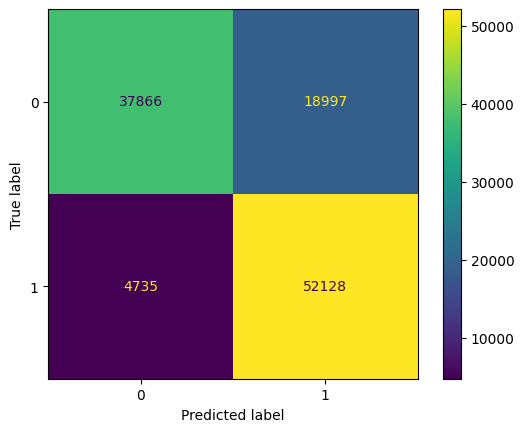

In [ ]:
lr_result = evaluation_result(lr,X_test,Y_test)
lr_probs = lr.predict_proba(X_test)

Random Forest and Decision Tree Classifiers

In [ ]:
#Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100,random_state = 2)
random_forest.fit(X_train,Y_train)

RandomForestClassifier(random_state=2)

Precision Score :  0.9996658635668185
Recall Score :  0.9999648172254864
Accuracy Score :  0.999815345655347
F1 Score :  0.9998153180487032


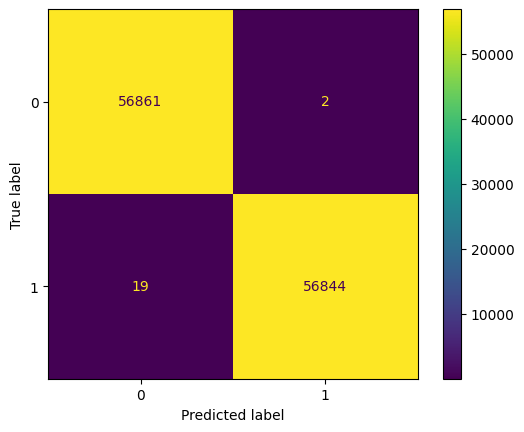

In [ ]:
rf_result = evaluation_result(random_forest,X_test,Y_test)
rf_probs = random_forest.predict_proba(X_test)

In [ ]:
xg = xgb.XGBClassifier()

In [ ]:
xg.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

Precision Score :  0.9995779329265075
Recall Score :  0.9999648141306451
Accuracy Score :  0.9997713803351916
F1 Score :  0.9997713361007529


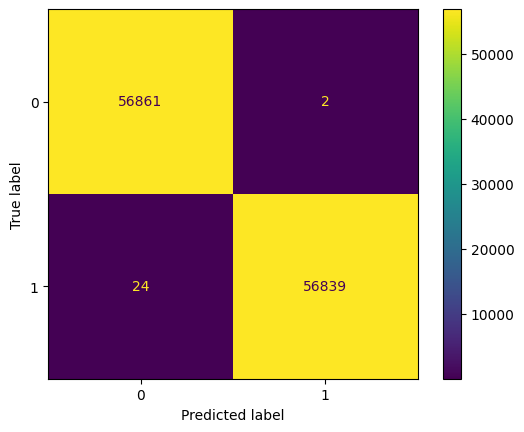

In [ ]:
xg_result = evaluation_result(xg,X_test,Y_test)
xg_probs = xg.predict_proba(X_test)

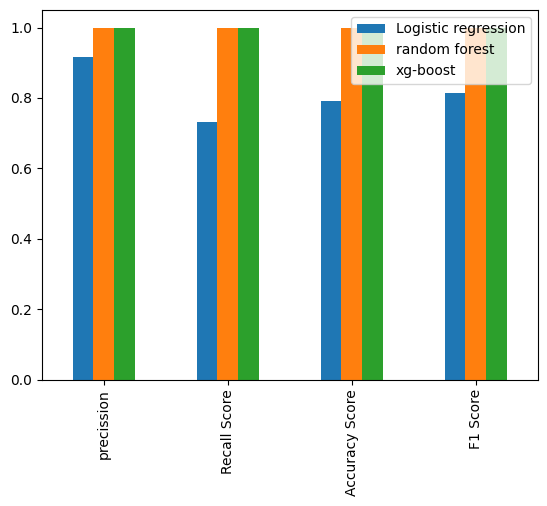

In [ ]:
p = pd.DataFrame({'Logistic regression': lr_result,
                  'random forest' : rf_result,
                  'xg-boost' : xg_result})
p.plot.bar();

In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1],[0,1], color = 'green', linestyle = '--', label = 'Guessing')
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('true positive rate(tpr)')
    plt.title('Receiver Operating Characteristics(ROC) Curve')
    plt.legend()
    plt.show()


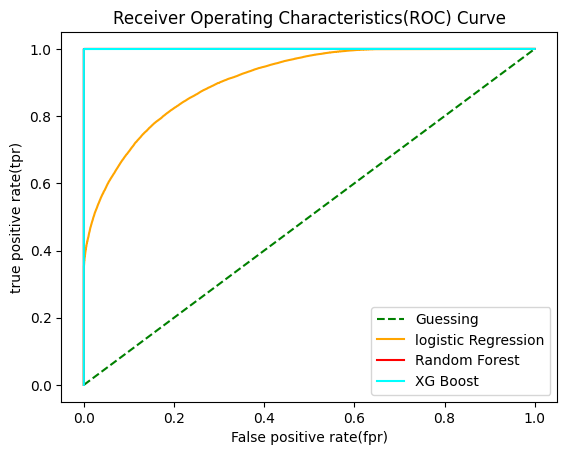

In [ ]:

plt.plot([0,1],[0,1], color = 'green', linestyle = '--', label = 'Guessing')
plt.xlabel('False positive rate(fpr)')
plt.ylabel('true positive rate(tpr)')
plt.title('Receiver Operating Characteristics(ROC) Curve')

# logistic regression
fpr, tpr, threshold = roc_curve(Y_test,lr_probs[:,1])
plt.plot(fpr,tpr, color = 'orange', label = 'logistic Regression')

# random forest
fpr, tpr, threshold = roc_curve(Y_test,rf_probs[:,1])
plt.plot(fpr,tpr, color = 'red', label = 'Random Forest')

# xg boost
fpr, tpr, threshold = roc_curve(Y_test,xg_probs[:,1])
plt.plot(fpr,tpr, color = 'cyan', label = 'XG Boost')

plt.legend()
plt.show()


In [ ]:
from sklearn.ensemble import VotingClassifier
# Combine the models using majority voting

ensemble = VotingClassifier(estimators=[('logistic regression', lr), ('random forest', random_forest), ('xg-boost', xg)])

# Fit the ensemble on the training data
ensemble.fit(X_train, Y_train)

# Evaluate the performance of the ensemble on the testing data
print(f"Accuracy of the ensemble: {ensemble.score(X_test, Y_test)*100} %")

Accuracy of the ensemble: 99.97889664632538 %


Precision Score :  0.9996131051826319
Recall Score :  0.999964815368647
Accuracy Score :  0.9997889664632538
F1 Score :  0.9997889293440979


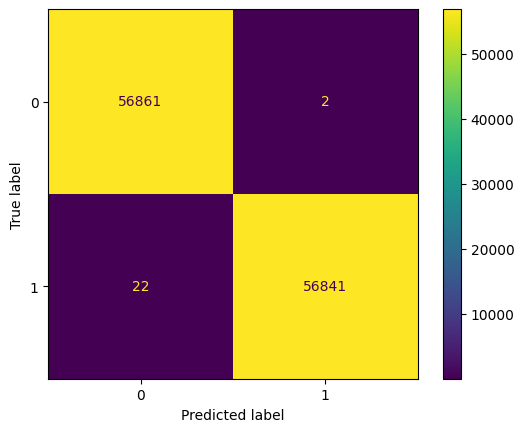

In [ ]:
ensemble_result = evaluation_result(ensemble,X_test,Y_test)
